# Simple Calculations of the Plaid Problem

MOSES inversions by various methods, including SMART, tend to show artifacts such as high intensity streaks spreading from bright features along the projection directions. We call this plaid. It looks obviously wrong to the eye, so it seems that we should be able to teach the computer to avoid such implausible solutions.

## Simplest Example
I worked out much of the following example with paper and pen before putting it into Python. It is helpful to see an example small enough for a human to do the arithmetic by hand. 

### Bright Point on Background
First, we have a bright point sitting on a uniform background. Without loss of generality, I have put the bright point in the corner of the array:

In [1]:
import numpy as np
Nx = 10
Ny = 5
I = np.ones((Nx,Ny))
I[0,0]=51
N = np.sum(I)
print('Image: \n',I,'\n')
print('total counts: ',N)

Image: 
 [[51.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]] 

total counts:  100.0


### Data Projections
I obtain two projections (the "data") by summing along the columns and rows.

In [2]:
D1 = np.sum(I,0, keepdims=True)
D2 = np.sum(I,1, keepdims=True)
print(D1,'\n\n',D2)

[[60. 10. 10. 10. 10.]] 

 [[55.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]]


### Multiplicative Inverse
The multiplicative inverse, $G$, is obtained by an outer product of the data arrays:

In [3]:
G = np.matmul(D2,D1)/N
print('Multiplicative inverse G = \n',G,'\n')

DG1 = np.sum(G,0, keepdims=True)
DG2 = np.sum(G,1, keepdims=True)
print('Projections through the inverse: \n',DG1,'\n\n',DG2)

Multiplicative inverse G = 
 [[33.   5.5  5.5  5.5  5.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]] 

Projections through the inverse: 
 [[60. 10. 10. 10. 10.]] 

 [[55.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]
 [ 5.]]


### Residuals and Nullspace
The image $I$ and the multiplicative inverse $G$ are quite different, even though the multiplicative inverse reproduces both data projections exactly. The multiplicative inverse shows the plaid quite clearly, with the high intensitiex in the zeroth column and zeroth row. Both the bright point and the background have contributed substantial intensity to this plaid artifact.

The residuals array,
$$
R \equiv I-G,
$$ 
is an element of the nullspace of the projection operator, meaning that the projections along its rows and columns are zero. Note: I am using the word residuals in a non-standard way. Usually it would refer to the difference between the data and the forward model, which in this case is identically zero.

In [4]:
R=I-G
print('Residuals R = \n',R,'\n')

Residuals R = 
 [[18.  -4.5 -4.5 -4.5 -4.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]
 [-2.   0.5  0.5  0.5  0.5]] 



### Range of Data Interpretations
The residuals array $R$ is of course not the only element of the nullspace. Any array with zero sums of the rows and columns is a nullspace element. However, the residuals array can be used to generate a continuous range of alternative inverses of the data by the linear combination
$$
    A = G + \alpha R.
$$
Only nonnegative alternatives $A$ should be deemed plausible. That places limits on the possible values of $\alpha$. In this example,
$$
-1 \le \alpha \le \frac{11}{9}.
$$
Below I display the inverses using the extreme values of $\alpha$,
$$
P \equiv G - R; \quad X \equiv G +  \frac{11}{9} R.
$$
Let's call $P$ the plaid extreme, since it maximizes the plaid artifact. The opposite extreme, $X$, features an inverse plaid; the bright point and background are both enhanced.

In [5]:
P = G-R
X = G + 11*R/9
print('Extremal inverses:')
print('P = \n',P,'\n')
print('X = \n',X)

Extremal inverses:
P = 
 [[15. 10. 10. 10. 10.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]
 [ 5.  0.  0.  0.  0.]] 

X = 
 [[55.          0.          0.          0.          0.        ]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]
 [ 0.55555556  1.11111111  1.11111111  1.11111111  1.11111111]]


### Global Measures
Faced with a range of interpretations $A_\alpha$, how would we choose a "best" inverse? Let's consider two global image measures to characterize the range of interpretations of our data. The energy is defined as the sum of squares over the image:
$$
    E \equiv \sum_{ij} A_{ij}^2.
$$
The Shannon entropy of an image is
$$
    S \equiv -\sum_{ij} P_{ij} \log_2 P_{ij}, \quad \text{where}\quad 
    P_{ij} \equiv \frac{A_{ij}}{N} = \frac{A_{ij}}{\sum_{ij}A_{ij}}.
$$
Traditionally, the probability $P$ is calculated using an image histogram. I will also try interpreting the image array itself as a histogram, and I will call the result the "array entropy". The sum is to be carried out under the interpretation that $P_{ij}=0$ results in a zero term. This can be implemented with `np.nansum`, as follows.

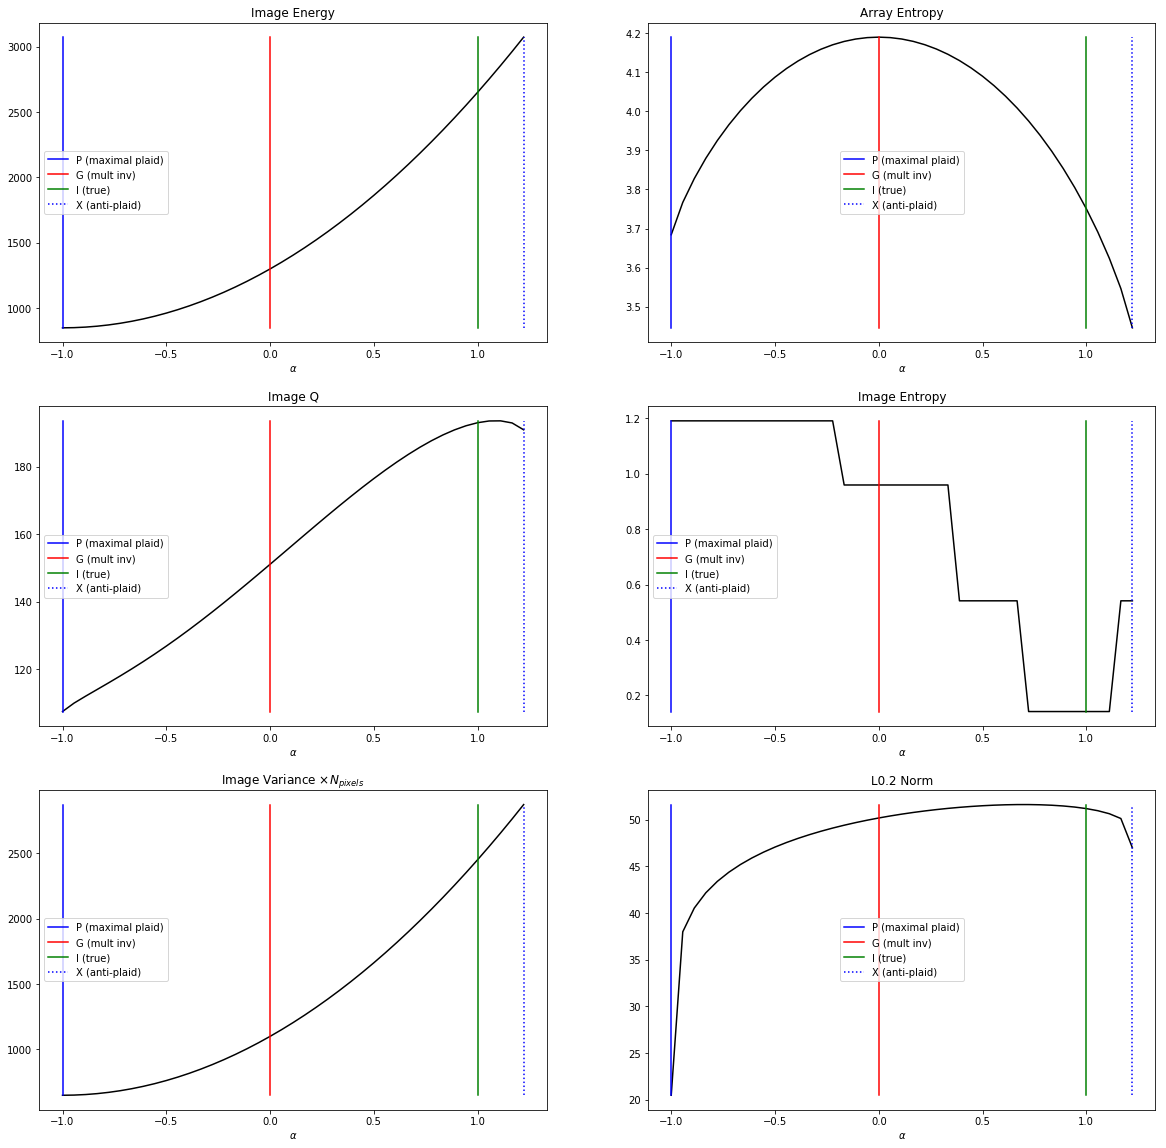

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def entropy(signal):
        '''
        function returns entropy of a signal
        signal must be a 1-D numpy array
        
        stolen from https://www.hdm-stuttgart.de/~maucher/Python/MMCodecs/html/basicFunctions.html
        '''
        lensig=signal.size
        symset=list(set(signal))
        numsym=len(symset)
        propab=[np.size(signal[signal==i])/(1.0*lensig) for i in symset]
        ent=np.sum([p*np.log2(1.0/p) for p in propab])
        return ent

old = np.seterr(invalid='ignore',divide='ignore') 
    # temporarily ignore various warnings generated by np.log2()

alpha = np.arange(-1,11./9.,0.5/9.)
Nalpha = alpha.size
E = np.zeros((Nalpha))
S = np.zeros((Nalpha))
S2= np.zeros((Nalpha))
Q = np.zeros((Nalpha))
V = np.zeros((Nalpha))
V2= np.zeros((Nalpha))
Lfrac = np.zeros((Nalpha))
for i in range(Nalpha):
    A = G + alpha[i]*R
    E[i] = np.sum(A**2)
    P = A/N
    S[i] = -np.nansum(P * np.log2(P))
    Lfrac[i] = np.nansum(A**0.2) # Lp norm for small p
    S2[i] = entropy(np.ndarray.flatten(np.sqrt(np.abs(A)).round()))
    V[i] = np.var(A) * A.size # variance times A.size() should be comparable, but not identical to 'energy.'
    Q[i] = np.sqrt(E[i])*S[i]
    #Q[i] = np.nansum(A**0.2)
np.seterr(**old) # restore default warning behavior

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.plot(alpha,E,'k')
plt.title('Image Energy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([E.min(),E.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([E.min(),E.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([E.min(),E.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([E.min(),E.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.subplot(322)
plt.plot(alpha,S,'k')
plt.title('Array Entropy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([S.min(),S.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([S.min(),S.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([S.min(),S.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([S.min(),S.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.subplot(323)
plt.plot(alpha,Q,'k')
plt.title('Image Q')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([Q.min(),Q.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([Q.min(),Q.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([Q.min(),Q.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([Q.min(),Q.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.subplot(324)
plt.plot(alpha,S2,'k')
plt.title('Image Entropy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([S2.min(),S2.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([S2.min(),S2.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([S2.min(),S2.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([S2.min(),S2.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.subplot(325)
plt.plot(alpha,V,'k')
plt.title(r'Image Variance $\times N_{pixels}$')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([V.min(),V.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([V.min(),V.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([V.min(),V.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([V.min(),V.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.subplot(326)
plt.plot(alpha,Lfrac,'k')
plt.title(r'L0.2 Norm')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([-1,-1]),np.array([Lfrac.min(),Lfrac.max()]),'b',label='P (maximal plaid)')
plt.plot(np.array([0,0]),np.array([Lfrac.min(),Lfrac.max()]),'r',label='G (mult inv)')
plt.plot(np.array([1,1]),np.array([Lfrac.min(),Lfrac.max()]),'g',label='I (true)')
plt.plot(np.array([alpha[-1],alpha[-1]]),np.array([Lfrac.min(),Lfrac.max()]),'b:',label='X (anti-plaid)')
plt.legend()

plt.show();

### Discussion
What have I learned?
1. Image energy and "array entropy" vary across the possible inverses.
1. The multiplicative inverse is maximum entropy in this example. I bet this is not accidental.
1. The "true" image, $I$, which I regard as the simplest and most compact interpretation of the data, is not an extremum of energy or entropy.
1. The "true" image, $I$, has much greater energy than the multiplicative inverse.
1. $Q=S\sqrt{E}$ and the fractional norms of $A$ have maxima near $I$. Maybe there is some other global quantity for which $I$ is an extremum.
1. If I calculate image entropy in the conventional way, by doing $\sum p \log p$ on a histogram of the image, then the entropy curve is flat as a function of $\alpha$ except for the true image, which has lower entropy because it has fewer distinct pixel values. My current implementation calculates entropy on the _square root_ of the image, with the idea that image values are distinct only if the intensity changes at a significant level. Unfortunately the steps are very discrete, but there is a minimum in the neighborhood of the true image.
1. The variance is similar in behavior to the Image Energy.
1. The multiplicative inverse is exactly halfway between the maximal plaid and the true image. That is, $G=(P+I)/2$.

It might be possible to improve the fit by (not quite) maximizing image energy. My main difficulty with that would be knowing where to quit. Maximizing $Q=S\sqrt{E}$ would be even better, it's just harder to see how to do it.

And here is a Crazy based on the last observation:
1. Calculate the multiplicative inverse, $G$.
1. Find the maximal plaid, $P$, by minimizing the energy.
1. Estimate $I$ by assuming $G$ is half way between $P$ and $I$:
$$
    \boxed{ I = 2G-P. }
$$

### Image Energy
I want to try increasing the image energy in a blind fashion, not knowing the answer that I am groping for, to see if or how much that helps.

In [7]:
# Image Energy Experiment

# Refresh the data.
D1 = np.sum(I,0, keepdims=True)
D2 = np.sum(I,1, keepdims=True)

# Mini-SMART.
Niter = 10  # Number of iterations
gamma = 0.5 # Correction index
alpha = 0.33 # Contrast enhancement index
GG = np.ones((Nx,Ny)) # Initialize guess

# Zeroth iteration, exact fit to data
DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
C1 = D1/DD1 # Correction factor
C2 = D2/DD2 # Correction factor
GG *= np.matmul(C2,C1) # Apply corrections
GG *= N/GG.sum() # Renormalize
DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
chisq1 = np.mean((DD1-D1)**2/D1)
chisq2 = np.mean((DD2-D2)**2/D2)
print('Chisq(1,2) = ',chisq1,chisq2)
print('GG = \n',GG,'\n')

for i in range(Niter):
    GG *= (1 + GG**alpha)
    DD1 = np.sum(GG,0, keepdims=True) # Forward model
    DD2 = np.sum(GG,1, keepdims=True) # Forward model
    print('Chisq(1,2) = ',chisq1,chisq2)
    C1 = D1/DD1 # Correction factor
    C2 = D2/DD2 # Correction factor
    GG *= np.matmul(C2,C1)**gamma # Apply corrections
    GG *= N/GG.sum() # Renormalize
    DD1 = np.sum(GG,0, keepdims=True) # Forward model
    DD2 = np.sum(GG,1, keepdims=True) # Forward model
    chisq1 = np.mean((DD1-D1)**2/D1)
    chisq2 = np.mean((DD2-D2)**2/D2)
    print('Iteration = ',i,' GG = \n',GG,'\n')

DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
C1 = D1/DD1 # Correction factor
C2 = D2/DD2 # Correction factor
GG *= np.matmul(C2,C1)**gamma # Apply corrections
GG *= N/GG.sum() # Renormalize
DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
chisq1 = np.mean((DD1-D1)**2/D1)
chisq2 = np.mean((DD2-D2)**2/D2)
print('Chisq(1,2) = ',chisq1,chisq2)
print('GG = \n',GG,'\n')

DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
C1 = D1/DD1 # Correction factor
C2 = D2/DD2 # Correction factor
GG *= np.matmul(C2,C1)**gamma # Apply corrections
GG *= N/GG.sum() # Renormalize
DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
chisq1 = np.mean((DD1-D1)**2/D1)
chisq2 = np.mean((DD2-D2)**2/D2)
print('Chisq(1,2) = ',chisq1,chisq2)
print('GG = \n',GG,'\n')

DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
C1 = D1/DD1 # Correction factor
C2 = D2/DD2 # Correction factor
GG *= np.matmul(C2,C1)**gamma # Apply corrections
GG *= N/GG.sum() # Renormalize
DD1 = np.sum(GG,0, keepdims=True) # Forward model
DD2 = np.sum(GG,1, keepdims=True) # Forward model
chisq1 = np.mean((DD1-D1)**2/D1)
chisq2 = np.mean((DD2-D2)**2/D2)
print('Chisq(1,2) = ',chisq1,chisq2)
print('GG = \n',GG,'\n')






Chisq(1,2) =  0.0 0.0
GG = 
 [[33.   5.5  5.5  5.5  5.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]
 [ 3.   0.5  0.5  0.5  0.5]] 

Chisq(1,2) =  0.0 0.0
Iteration =  0  GG = 
 [[39.81691547  5.29610399  5.29610399  5.29610399  5.29610399]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]
 [ 2.71952946  0.40341398  0.40341398  0.40341398  0.40341398]] 

Chisq(1,2)

What have I learned?

For the simplified row/column deprojection problem, I've written an iterative MART. In addition to the usual projection and correction factors, I boosted the contrast of the guess array `GG` in every iteration. This suppresses the plaid after some number of iterations.
1. Correction exponent gamma=0.5 (1/#projections) is a good choice; larger values tend to cause oscillations, as I have noted in the distant past with previous MART work.
1. For the contrast enhancement, `G *= G**alpha` did not help appreciably. The multiplicative corrections largely cancel this. I got useful results with `G *= (1 + G**alpha)`. 
1.  If I run too long, it overcorrects to an inverse plaid. So this seems to be just boosting the image energy.

## More Sophisticated Example
Let's try a slightly more realistic case.

multinv normalization:  505.00000000000017  out of  505.0
multinv normalization:  505.00000000000006  out of  505.0
multinv normalization:  505.00000000000006  out of  505.0


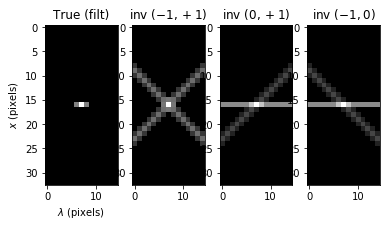

In [8]:
import moses
import scipy.signal as sig

# Test image, I
Nx = 33
Nlambda = 15
lambda0 = int(Nlambda/2)
bg_value = 1.0         # background value
brightpoint_I = 10.0 # magnitude of bright point
brightpoint_x = int( Nx/2 )           # bright point location
brightpoint_lambda = int( Nlambda/2 ) # bright point location
j0 = brightpoint_lambda # Bright point is at nominal center on wevelength axis
I = bg_value * np.ones((Nx,Nlambda))
I[brightpoint_x, brightpoint_lambda] = I[brightpoint_x, brightpoint_lambda] + brightpoint_I

# Smoothing of I(x,lambda)
#kappa = np.array([[1,2,1],[2,4,2],[1,2,1]])/16.0 # smoothed in both x and lamba
kappa = np.array([[0,0,0],[1,2,1],[0,0,0]])/4.0 # smoothed in lambda
#kappa = np.array([[0,1,0],[0,2,0],[0,1,0]])/4.0 # smoothed in x
I2  = sig.convolve2d(I, kappa, boundary='wrap', mode='same')

# Forward model
Dp = moses.fomod(I2,1,j0)
D0 = moses.fomod(I2,0,j0)
Dm = moses.fomod(I2,-1,j0)

# Multiplicative inverses
I0 = moses.multinv(Dp, Dm, 1, -1, Nlambda, j0, compact=False)
Ip = moses.multinv(D0, Dm, 0, -1, Nlambda, j0, compact=False)
Im = moses.multinv(Dp, D0, 1, 0,  Nlambda, j0, compact=False)


# Display True (filtered) image, I2
ax = plt.subplot(141)
plot = plt.imshow(I2)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('True (filt)')
plot.set_cmap('gray')

# Display the various multiplicative inverses
ax = plt.subplot(142)
plot = plt.imshow(I0)
plt.title('inv ($-1,+1$)')
plot.set_cmap('gray')

ax = plt.subplot(143)
plot = plt.imshow(Im)
plt.title('inv ($0,+1$)')
plot.set_cmap('gray')

ax = plt.subplot(144)
plot = plt.imshow(Ip)
plt.title('inv ($-1,0$)')
plot.set_cmap('gray')

plt.show()

### MART
Time to add (S)MART to `moses.py`.

15310.333333333334
outeration  1  of, at most,  1
MART iteration  1  of, at most,  100
0  order "reduced chisquare" =  190.80501400688158
1  order "reduced chisquare" =  60.653377400286146
-1  order "reduced chisquare" =  59.13960001547403
MART iteration  2  of, at most,  100
0  order "reduced chisquare" =  21.326423218388264
1  order "reduced chisquare" =  7.044296138701582
-1  order "reduced chisquare" =  7.241096701632639
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  3.6694396979153288
1  order "reduced chisquare" =  1.1183500743083776
-1  order "reduced chisquare" =  1.2930910449483646
MART iteration  4  of, at most,  100
0  order "reduced chisquare" =  1.1770542290476265
1  order "reduced chisquare" =  0.3746730383962319
-1  order "reduced chisquare" =  0.5288181354425371
MART iteration  5  of, at most,  100
0  order "reduced chisquare" =  0.13078240398924165
1  order "reduced chisquare" =  0.3746730383962319
-1  order "reduced chisquare" =  0.52881813544253

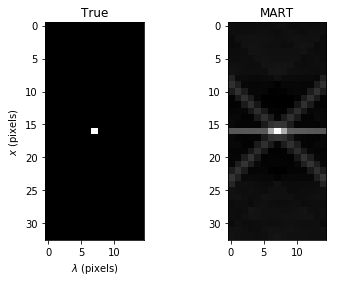

In [9]:
I *= 1000 # more counts
# Calculate data with Poisson noise:
Dp = np.random.poisson(moses.fomod(I, 1,j0)).astype(float)
D0 = np.random.poisson(moses.fomod(I, 0,j0)).astype(float)
Dm = np.random.poisson(moses.fomod(I,-1,j0)).astype(float)
print(np.mean(Dp))

DataArr = np.array([D0,Dp,Dm])
mArr = np.array([0,1,-1])
Gmart = moses.mart(DataArr, mArr, Nlambda, j0, maxiter=100)

# Display True image, I
ax = plt.subplot(121)
plot = plt.imshow(I)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('True')
plot.set_cmap('gray')

# Display the various multiplicative inverses
ax = plt.subplot(122)
plot = plt.imshow(Gmart)
plt.title('MART')
plot.set_cmap('gray')



$\uparrow\uparrow\uparrow$ The above images have linear scaling. $\uparrow\uparrow\uparrow$

In [10]:
# Now with "regularization," in a hand-tuned way...
GmartReg = moses.mart(DataArr, mArr, Nlambda, j0, Filter=moses.contrasty, maxiter=100, 
                      maxouter=32, Verbose=True)

outeration  1  of, at most,  32
MART iteration  1  of, at most,  100
0  order "reduced chisquare" =  190.80501400688158
1  order "reduced chisquare" =  60.65337740028624
-1  order "reduced chisquare" =  59.13960001547402
MART iteration  2  of, at most,  100
0  order "reduced chisquare" =  21.32642321838829
1  order "reduced chisquare" =  7.044296138701556
-1  order "reduced chisquare" =  7.241096701632635
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  3.6694396979153137
1  order "reduced chisquare" =  1.1183500743083852
-1  order "reduced chisquare" =  1.29309104494836
MART iteration  4  of, at most,  100
0  order "reduced chisquare" =  1.177054229047633
1  order "reduced chisquare" =  0.37467303839622434
-1  order "reduced chisquare" =  0.5288181354425444
MART iteration  5  of, at most,  100
0  order "reduced chisquare" =  0.13078240398924287
1  order "reduced chisquare" =  0.37467303839622434
-1  order "reduced chisquare" =  0.5288181354425444
MART LGOF iteratio

1  order "reduced chisquare" =  0.20630044217333793
-1  order "reduced chisquare" =  0.2906573672503573
MART LGOF iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.49423017821855464
1  order "reduced chisquare" =  0.20630044217333793
-1  order "reduced chisquare" =  0.2906573672503573
outeration  14  of, at most,  32
MART iteration  1  of, at most,  100
0  order "reduced chisquare" =  6.143552453016474
1  order "reduced chisquare" =  3.2353373098461833
-1  order "reduced chisquare" =  3.2224909482696478
MART iteration  2  of, at most,  100
0  order "reduced chisquare" =  1.6938643974276613
1  order "reduced chisquare" =  0.7436705333696262
-1  order "reduced chisquare" =  0.9239835235572
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.18820500603161938
1  order "reduced chisquare" =  0.7436705333696262
-1  order "reduced chisquare" =  0.9239835235572
MART LGOF iteration  1  of, at most,  100
0  order "reduced chisquare" =  0.18820500603161938
1  o

0  order "reduced chisquare" =  0.5183195430792864
1  order "reduced chisquare" =  0.4037561049155876
-1  order "reduced chisquare" =  0.4001053467964907
outeration  18  of, at most,  32
MART iteration  1  of, at most,  100
0  order "reduced chisquare" =  5.551436557823001
1  order "reduced chisquare" =  3.4942841383324126
-1  order "reduced chisquare" =  3.025645926317506
MART iteration  2  of, at most,  100
0  order "reduced chisquare" =  2.03011033218551
1  order "reduced chisquare" =  0.9563378085178895
-1  order "reduced chisquare" =  1.1353812159265837
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.826283443464778
1  order "reduced chisquare" =  0.834035768083225
-1  order "reduced chisquare" =  0.12615191802413125
MART LGOF iteration  1  of, at most,  100
0  order "reduced chisquare" =  0.826283443464778
1  order "reduced chisquare" =  1.3949109183540818
-1  order "reduced chisquare" =  0.371363448169777
MART LGOF iteration  2  of, at most,  100
0  order 

-1  order "reduced chisquare" =  1.2251769687585412
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.8598690978312098
1  order "reduced chisquare" =  0.799271721005632
-1  order "reduced chisquare" =  0.13612885051487003
MART LGOF iteration  1  of, at most,  100
0  order "reduced chisquare" =  0.8598690978312098
1  order "reduced chisquare" =  1.3324255237276077
-1  order "reduced chisquare" =  0.39380920330151
MART LGOF iteration  2  of, at most,  100
0  order "reduced chisquare" =  0.8268419032634283
1  order "reduced chisquare" =  0.5547973654802139
-1  order "reduced chisquare" =  0.5340387020833791
MART LGOF iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.8845510688268807
1  order "reduced chisquare" =  0.8485515035759853
-1  order "reduced chisquare" =  0.7138268160930935
MART LGOF iteration  4  of, at most,  100
0  order "reduced chisquare" =  0.6533395220416558
1  order "reduced chisquare" =  0.5232909621527184
-1  order "reduced chisquar

1  order "reduced chisquare" =  0.9146371573474276
-1  order "reduced chisquare" =  1.1518195992050657
MART iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.8218471274616891
1  order "reduced chisquare" =  0.7820779178825555
-1  order "reduced chisquare" =  0.12797828770482086
MART LGOF iteration  1  of, at most,  100
0  order "reduced chisquare" =  0.8218471274616891
1  order "reduced chisquare" =  1.326407156554891
-1  order "reduced chisquare" =  0.3792548551310148
MART LGOF iteration  2  of, at most,  100
0  order "reduced chisquare" =  0.8210886167316208
1  order "reduced chisquare" =  0.5023626123087236
-1  order "reduced chisquare" =  0.4488279855499296
MART LGOF iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.78685370580823
1  order "reduced chisquare" =  0.7432712406511073
-1  order "reduced chisquare" =  0.6701273501468082
MART LGOF iteration  4  of, at most,  100
0  order "reduced chisquare" =  0.6915871401264245
1  order "reduced chisquare

-1  order "reduced chisquare" =  0.3367756873980849
MART LGOF iteration  2  of, at most,  100
0  order "reduced chisquare" =  0.8764134959572502
1  order "reduced chisquare" =  0.5687588919481787
-1  order "reduced chisquare" =  0.49437187590722254
MART LGOF iteration  3  of, at most,  100
0  order "reduced chisquare" =  0.8161340530814954
1  order "reduced chisquare" =  0.6987737994545953
-1  order "reduced chisquare" =  0.7202793772825361
MART LGOF iteration  4  of, at most,  100
0  order "reduced chisquare" =  0.6643698501202909
1  order "reduced chisquare" =  0.5859062315760193
-1  order "reduced chisquare" =  0.5499657454530145
MART LGOF iteration  5  of, at most,  100
0  order "reduced chisquare" =  0.7219821275344257
1  order "reduced chisquare" =  0.6008144470973362
-1  order "reduced chisquare" =  0.5943588091926663
MART LGOF iteration  6  of, at most,  100
0  order "reduced chisquare" =  0.6511647844492107
1  order "reduced chisquare" =  0.5177891641786473
-1  order "reduced 

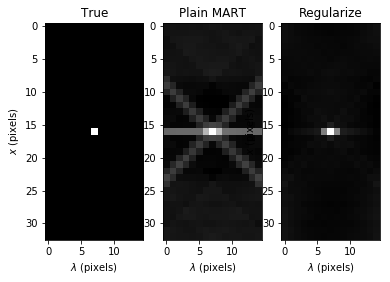

In [11]:
fig = plt.figure(1)
plt.title('Square root scaled comparison')

# Display True image, I
ax = plt.subplot(131)
plot = plt.imshow(I)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('True')
plot.set_cmap('gray')

# Display the MART inverse
ax = plt.subplot(132)
plot = plt.imshow(Gmart**0.5)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('Plain MART')
plot.set_cmap('gray')

# Display the regularlized MART inverse
ax = plt.subplot(133)
plot = plt.imshow(GmartReg**0.5)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('Regularize')
plot.set_cmap('gray')

plt.show()

### What am I learning?
First (not shown), I tried to insert a nonlinear contrast enhancement to help regularize the output of `moses.mart`, much as I did by hand with the simple row/column projection above. At first, I had the nonlinear mapping $G \leftarrow G(1+G^p)$ before every MART correction. The regularization sort of worked. Depending on how I tuned $p$, I would either get the usual MART result or I would recover a point source (without the anti-aliasing I would expect, since the `AntiAlias` keyword was turned on!). But this is very much brute force, in the sense that I suspect this would invert almost __any__ data to a point source by cranking up the contrast violently. Moreover, playing with it showed me that the regularization is extremely touchy. An instability was evident looking at the history of the simulation: the brigher the brightest pixel, the stronger the contrast enhancement.

In the current version, I have an outer loop ("outeration") and an inner loop ("iteration").  We then kick out of the iteration loop. This seems fairly well behaved, as long as I don't overdo it with $p$. The above plots are __square root scaled__ to show the fainter features more clearly. The nonlinear contrast enhancement occurs with each outeration; then we iterate until chisquared looks good. Depending on $p$ and the number of outerations, I can get a range of results from almost the same as MART to the correct (anti-aliased) bright point to nasty artifacts, as described in the following table.

| p | outerations | result |
|---|---|---|
| 0.2 | 20 | mildly attenuated plaid |
| 0.2 | 32 | bright point with 1-2-1 intensity profile, reflecting the $m=\pm 1$ filtering. |
| 0.2 | 50 | bright point with inverse plaid. |
| 0.2 | 60 | Anti-aliased BP has rotated 90 deg; inverse plaid pattern broadened. |
| 0.2 | 80 | Satellite bright points appear. Terrible! |


### Toward Regularization
The above results are encouraging, but generally show that I can't just ramp up the contrast indefinitely with something like `moses.contrasty` in the outer loop. This was anticipated with my simplest experiments above with  Global Measures, exploring the path from the multiplicative inverse to the 'true' solution $I$. 

Next, I will do a similar analysis with my slightly more sophisticated solution, which contains a bright point on a background observed with the three standard MOSES projections. In the presence of noise on the data, the difference between a particular solution and the 'true' is no longer exactly a member of the nullspace. But, the difference between vanilla MART result $G_m$ and the 'regularized' solution $G_{r}$ _is_ (at least more nearly) element of the null space. As I did with the section above on Global Measures, I'll use this null space element to paramaterize a curve through the space of solutions that fit the data, to look for candidate regularizations:
$$
    R \equiv G_r - G_m; \quad A = G_m + \alpha R.
$$
When $0 \le \alpha \le 1$, $A$ will transition smoothly from the guess $G$ to the true result $I$. Subject to $A \ge 0$, I should be able to extend that range somewhat.

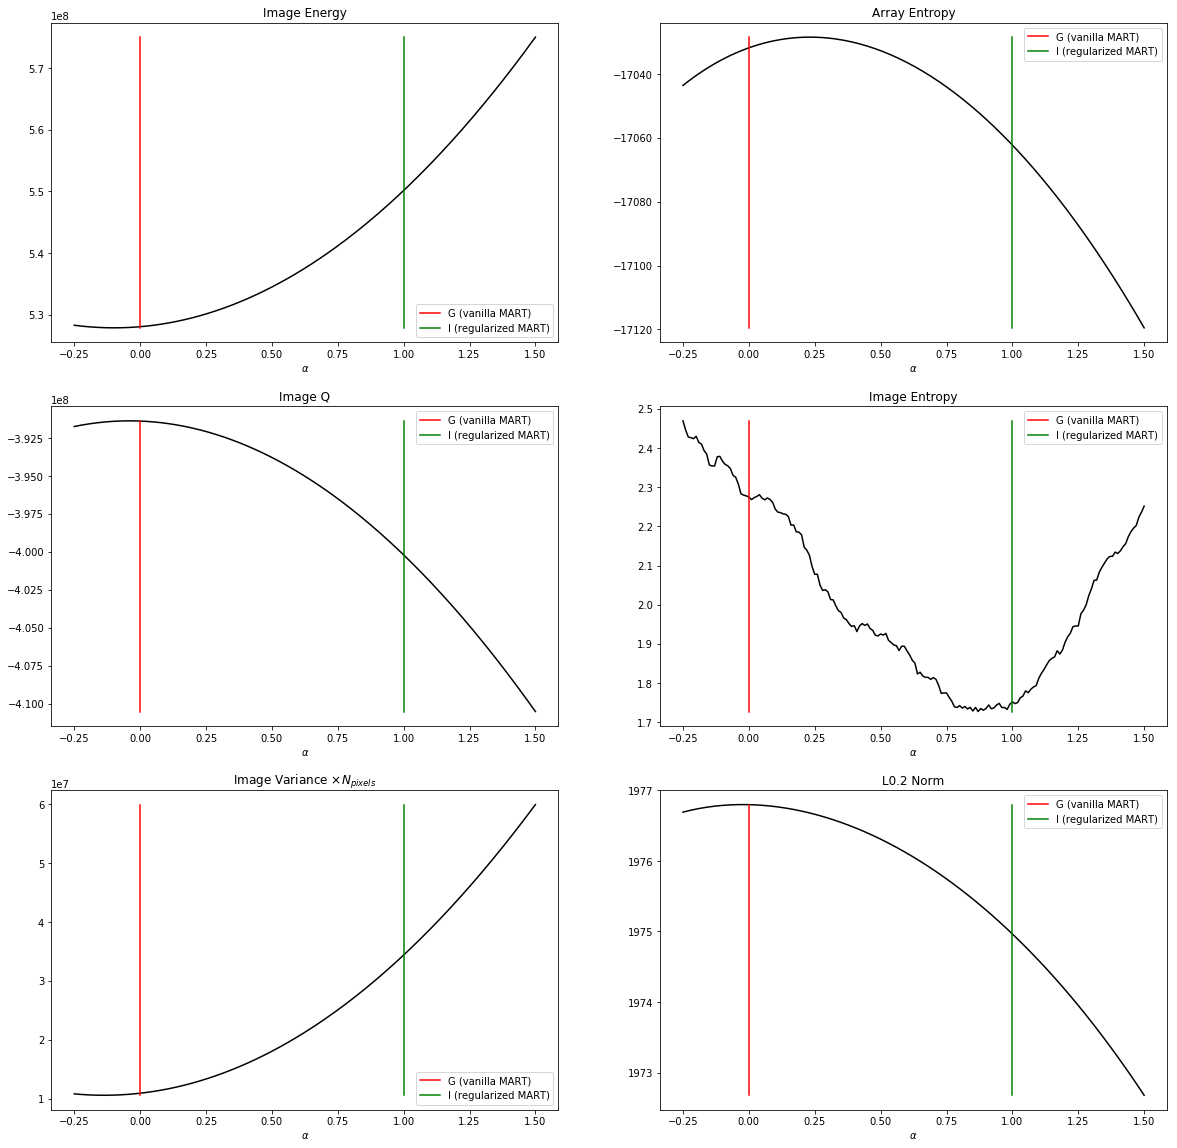

In [12]:
R = GmartReg - Gmart
alpha = np.arange(-0.25,1.501,0.01)
Nalpha = alpha.size
E = np.zeros((Nalpha))
S = np.zeros((Nalpha))
S2= np.zeros((Nalpha))
Q = np.zeros((Nalpha))
V = np.zeros((Nalpha))
V2= np.zeros((Nalpha))
Lfrac = np.zeros((Nalpha))
old = np.seterr(invalid='ignore',divide='ignore') 
    # temporarily ignore various warnings generated by np.log2()
for i in range(Nalpha):
    A = Gmart + alpha[i]*R
    E[i] = np.sum(A**2)
    P = A/N
    S[i] = -np.nansum(P * np.log2(P))
    Lfrac[i] = np.nansum(A**0.2) # Lp norm for small p
    S2[i] = entropy(np.ndarray.flatten(np.sqrt(A).round()))
    V[i] = np.var(A) * A.size # variance times A.size() should be comparable, but not identical to 'energy.'
    Q[i] = np.sqrt(E[i])*S[i]
    #Q[i] = np.nansum(A**0.2)
np.seterr(**old) # restore default warning behavior



plt.figure(figsize=(20,20))
plt.subplot(321)
plt.plot(alpha,E,'k')
plt.title('Image Energy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([E.min(),E.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([E.min(),E.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.subplot(322)
plt.plot(alpha,S,'k')
plt.title('Array Entropy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([S.min(),S.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([S.min(),S.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.subplot(323)
plt.plot(alpha,Q,'k')
plt.title('Image Q')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([Q.min(),Q.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([Q.min(),Q.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.subplot(324)
plt.plot(alpha,S2,'k')
plt.title('Image Entropy')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([S2.min(),S2.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([S2.min(),S2.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.subplot(325)
plt.plot(alpha,V,'k')
plt.title(r'Image Variance $\times N_{pixels}$')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([V.min(),V.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([V.min(),V.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.subplot(326)
plt.plot(alpha,Lfrac,'k')
plt.title(r'L0.2 Norm')
plt.xlabel(r'$\alpha$')
plt.plot(np.array([0,0]),np.array([Lfrac.min(),Lfrac.max()]),'r',label='G (vanilla MART)')
plt.plot(np.array([1,1]),np.array([Lfrac.min(),Lfrac.max()]),'g',label='I (regularized MART)')
plt.legend()

plt.show();

#### Discussion
My various norms now all have extrema at or near the MART result, not near the true image.

To my surprise, image entropy (calculated, again, on the square root of the image) is looking a more useful now. Unfortunately it is a very rough function of $\alpha$.

### Image Entropy
I have added a `moses.negentropy` routine. The intent is to increase the contrast of the guess $G$, tracking this quantity, and choosing the result that yields a maximum. This is a crude automated regularization, without adjustable parameters. 

Note that an even lower `negentropy` is accessible within the null space, at $\alpha < 1$ in the above image entropy plot. So maybe I could do even better by deriving null space elements as I go along, and using them to search for minimum entropy?

In [13]:
# A modest attempt at automated regularization...
GmartReg = moses.mart(DataArr, mArr, Nlambda, j0, InitGuess=Gmart,
                      Filter=moses.contrasty, Maximize=moses.negentropy, 
                      maxiter=100, maxouter=50, Verbose=False)

Maximize(Guess) =  -2.2750768978131046
outeration  1  of, at most,  50
Maximize(Guess) =  -2.3329990544157977
outeration  2  of, at most,  50
Maximize(Guess) =  -2.346208253003841
outeration  3  of, at most,  50
Maximize(Guess) =  -2.359083439241496
outeration  4  of, at most,  50
Maximize(Guess) =  -2.378290053249549
outeration  5  of, at most,  50
Maximize(Guess) =  -2.3806890472870217
outeration  6  of, at most,  50
Maximize(Guess) =  -2.4211268255065126
outeration  7  of, at most,  50
Maximize(Guess) =  -2.478285309438742
outeration  8  of, at most,  50
Maximize(Guess) =  -2.526921469291556
outeration  9  of, at most,  50
Maximize(Guess) =  -2.58740748766105
outeration  10  of, at most,  50
Maximize(Guess) =  -2.611021140436263
outeration  11  of, at most,  50
Maximize(Guess) =  -2.6122586699594192
outeration  12  of, at most,  50
Maximize(Guess) =  -2.63868256657181
outeration  13  of, at most,  50
Maximize(Guess) =  -2.6353110413847047
outeration  14  of, at most,  50
Maximize(Gu

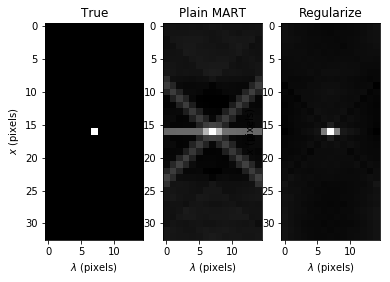

In [14]:
fig = plt.figure(1)
plt.title('Square root scaled comparison')

# Display True image, I
ax = plt.subplot(131)
plot = plt.imshow(I)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('True')
plot.set_cmap('gray')

# Display the MART inverse
ax = plt.subplot(132)
plot = plt.imshow(Gmart**0.5)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('Plain MART')
plot.set_cmap('gray')

# Display the regularlized MART inverse
ax = plt.subplot(133)
plot = plt.imshow(GmartReg**0.5)
plt.xlabel('$\lambda$ (pixels)')
plt.ylabel('$x$ (pixels)')
plt.title('Regularize')
plot.set_cmap('gray')

plt.show()